# The Sparks Foundation (GRIPDEC20 DSBA Task2)
## Task Objective: Exploratory data analysis on 'Global Terrorism' Dataset
## Author : Mrunal Battise


In [430]:
#Start

##  Importing Required Libraries

In [431]:
import pandas as pd                           
import numpy as np                                
import matplotlib.pyplot as plt                   
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

## Loading Dataset

In [432]:
data=pd.read_csv("global_terrorism.csv",encoding='ISO-8859-1')         #Reading Dataset using Pandas 
df1=pd.DataFrame(data)                                                  #Converting Dataset into Pandas DataFrame(2D)
df1.head() 


c:\users\mruna\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [433]:
df1.shape

(181691, 135)

## Data Cleaning

In [434]:
# Renameed the Columns
df1.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','city':'City',
                    'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                    'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                    'targsubtype1_txt':'Target_Subtype','weaptype1_txt':'Weapon_type','motive':'Motive',
                    'propextent_txt':'Property_Damage','weapsubtype1_txt':'Weapon_Subtype','nhostkid':'host_kids'
                   },inplace=True)

In [435]:
#Selected Columns of Interest Only
df=df1[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Property_Damage',
               'Target_Subtype','Wounded','Target','Summary','Group','Target_type','Weapon_type',
        'Weapon_Subtype','host_kids','Motive','success']]
df['Casualties']=df.Killed + df.Wounded           #Creating New Column

In [436]:
df.head()

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            City   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  ...                   Target Summary  \
0     1.0  ...             Julio Guzman     NaN   
1     0.0  ...  Nadine Chaval, daughter     NaN   
2     1.0  ...                 Employee     NaN   
3     NaN  ...             U.S. Embassy     NaN   
4     NaN  ...           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type          Weapon_Subtype host_kids Motive success  Casualties  
0     Unknown                     NaN       NaN    NaN       1         1.0  
1     Unknown                     NaN       1.0    NaN       1         0.0  
2     Unknown                     NaN       NaN    NaN       1         1.0  
3  Explosives  Unknown Explosive Type       NaN    NaN       1         NaN  
4  Incendiary                     NaN       NaN    NaN       1         NaN  

[5 rows x 23 columns]

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   City             181257 non-null  object 
 6   latitude         177135 non-null  float64
 7   longitude        177134 non-null  float64
 8   AttackType       181691 non-null  object 
 9   Killed           171378 non-null  float64
 10  Property_Damage  64065 non-null   object 
 11  Target_Subtype   171318 non-null  object 
 12  Wounded          165380 non-null  float64
 13  Target           181055 non-null  object 
 14  Summary          115562 non-null  object 
 15  Group            181691 non-null  object 
 16  Target_type      181691 non-null  obje

## Data is Ready to Analyse 

In [438]:
##

# 1.Analysing Terrorism in India

In [439]:
India=df[df["Country"]=='India']
India.shape


(11960, 23)

In [440]:
India=India.replace(np.nan,0)

## India faced around 12000 Terrorist attacks since 1972

In [441]:
year_plot=India.Year.value_counts()
year_plot[0:5]


2016    1025
2017     966
2015     884
2014     860
2013     694
Name: Year, dtype: int64

In [442]:
fig = px.bar(year_plot, x=year_plot.index, y=year_plot.values, title='No. of Terrorist Attacks in India(1972-2016)',
            labels={'y':'No. of Attacks','index':'Year'})
fig.show()

## In India Terrorist Attacks started increasing from 2008 exponentionaly
## There is no record of Terrorist Activity in 1993

In [443]:
India_Casualties=India.groupby(["Year"])["Casualties"].sum()
India_Casualties.tail()

Year
2013    1228.0
2014    1209.0
2015    1029.0
2016    1236.0
2017    1157.0
Name: Casualties, dtype: float64

In [444]:
fig = px.bar(year_plot, x=India_Casualties.index, y=India_Casualties.values, title='No. Casualties in India by Terrorist Attack(1976-2016)',
            labels={'y':'No. of Casualties','x':'Year'})
fig.show()

## Highest Casualties recored in window of 1988-1992 and 2005-2009 (more than 1500 Peoples every year)
## 2008 and 2006 has highest Casualties since 1972 resp.

In [445]:
India_kill=India.groupby(["Year"])["Killed"].sum()
India_Wounded=India.groupby(["Year"])["Wounded"].sum()


In [446]:
fig = po.Figure(data=[
    po.Bar(name='Attacks', x=year_plot.index, y=year_plot.values),
    po.Bar(name='Killed', x=India_kill.index, y=India_kill.values),
    po.Bar(name='Wounded', x=India_Wounded.index, y=India_Wounded.values),
])
fig.update_layout(title='Total Attacks,No. of People Killed and Wounded per Year')
fig.show()

## If observe the plot we can say even window of 1995 to 2007 has less attacks than window of 2008 to 2016 it recorded higher no. of casualties !!!
## May be because India retaliating the attacks quickly 


In [447]:
India.Group.value_counts().shape

(301,)

In [448]:
India_group=India.Group.value_counts()[0:15]
India_group

Unknown                                                         4263
Communist Party of India - Maoist (CPI-Maoist)                  1877
Maoists                                                         1396
Sikh Extremists                                                  710
United Liberation Front of Assam (ULFA)                          357
Hizbul Mujahideen (HM)                                           199
Lashkar-e-Taiba (LeT)                                            187
National Democratic Front of Bodoland (NDFB)                     174
Garo National Liberation Army                                    166
Muslim Separatists                                               118
People's War Group (PWG)                                          97
National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM)      89
People's Liberation Army (India)                                  88
Muslim Militants                                                  87
Bodo Militants                    

In [449]:
fig = px.pie(India_group, values=India_group.values, names=India_group.index, title='15 Most Active Terorist Groups-India',
            labels={'values':'No. of Attack','index':'Group'},hole=0.2)
fig.show()

## Even the data says that 43% attacks in India are done by Unknown Groups they are indirectly connected to Major Active Groups like Maoists,ULFA, Hizbul Mujhhideen and Lashkar-e-Taiba o 
## or we can say India Intelligence not found the main operators of 43% Attacks

In [450]:
India_kill=India.groupby(['Group'])['Killed'].sum()
India_kill=India_kill.sort_values(ascending=False)[0:10]
India_kill


Group
Unknown                                           4752.0
Sikh Extremists                                   2477.0
Communist Party of India - Maoist (CPI-Maoist)    2344.0
Lashkar-e-Taiba (LeT)                              969.0
Maoists                                            790.0
United Liberation Front of Assam (ULFA)            617.0
National Democratic Front of Bodoland (NDFB)       514.0
People's War Group (PWG)                           410.0
Hizbul Mujahideen (HM)                             409.0
Naxalites                                          408.0
Name: Killed, dtype: float64

In [451]:
fig = px.bar(year_plot, x=India_kill.index, y=India_kill.values, 
             title='10 Most Dealiest Terrorist Group(by People Killed)-India',
            labels={'y':'No. of People Killed','x':'Group'})
fig.show()

# Some Probable Insights-

## Sikh Extrimists had 4th Highest No. of Attacks though cause 2nd Highest No. of Kills

## Naxalites is not among the 15 Most Active Terrorist Group but caused 10th highest No. of Kill

## Maoists responsible for 19% attack in India(higest after unknown groups) but caused only death of 790 peoples(5th Highest).

In [452]:
India_group_Killed=India.groupby(['Group'])['Casualties','Killed',"Wounded"].sum()
India_group_Killed=India_group_Killed.sort_values(by=['Casualties'],ascending=False)[0:10]
India_group_Killed

<ipython-input-452-e414c317b577>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties  Killed  Wounded
Group                                                                      
Unknown                                            15200.0  4752.0  10879.0
Sikh Extremists                                     4577.0  2477.0   2147.0
Communist Party of India - Maoist (CPI-Maoist)      3945.0  2344.0   1663.0
Lashkar-e-Taiba (LeT)                               2863.0   969.0   1967.0
United Liberation Front of Assam (ULFA)             2727.0   617.0   2155.0
Maoists                                             1574.0   790.0    809.0
Hizbul Mujahideen (HM)                              1086.0   409.0    721.0
National Democratic Front of Bodoland (NDFB)         952.0   514.0    523.0
Muslim Militants                                     925.0   377.0    548.0
Bodo Militants                                       772.0   376.0    401.0

In [453]:
India_group_Killed.Casualties.index

Index(['Unknown', 'Sikh Extremists',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Lashkar-e-Taiba (LeT)', 'United Liberation Front of Assam (ULFA)',
       'Maoists', 'Hizbul Mujahideen (HM)',
       'National Democratic Front of Bodoland (NDFB)', 'Muslim Militants',
       'Bodo Militants'],
      dtype='object', name='Group')

In [454]:
fig = po.Figure(data=[
    po.Bar(name='Killed', x=India_group_Killed.Killed.index, y=India_group_Killed.Killed.values),
    po.Bar(name='Casualties', x=India_group_Killed.Casualties.index, y=India_group_Killed.Casualties.values),
    po.Bar(name='Wounded', x=India_group_Killed.Wounded.index, y=India_group_Killed.Wounded.values)
])
fig.update_layout(title='10 Most Dealiest Terrorist Groups(by Casualties)-India')

fig.show()

## Sikh Extrimists and CPI-Maoist are only groups in top 10 who caused more Kills than Wounded 
## Surprizing!!  around 15k Casualties caused by Unknown Groups 

In [455]:
India_city=India.City.value_counts()[0:20]
India_city.shape

(20,)

In [456]:
India_city

Srinagar                   658
Unknown                    624
Imphal                     426
New Delhi                  157
Amritsar                   138
Sopore                     102
Guwahati                    77
Ludhiana                    77
Anantnag                    76
Jammu                       57
Latehar district            55
Bijapur district            51
Sukma district              49
Darjeeling                  47
Chandigarh                  47
Delhi                       45
Pulwama                     42
West Midnapore district     41
Dimapur                     41
Dantewada district          41
Name: City, dtype: int64

In [457]:
fig = po.Figure(data=[po.Bar(
            x=India_city.index, y=India_city.values,
            text=India_city.values,
            textposition='auto',
        )])
fig.update_layout(title='20 Most Attacked Cities in India by Terrorists',yaxis={'title':'No. of Attacks'})
fig.show()

## Strange!! 624 time Cities in Dataset are Unknown, data should be updated 
## Shrinagar is worstly affacted compared to other 658 attacks in 44 Years i.e. around 15 Attacks per Year.
## If we observe most of cities are in North and North-East Part of India we can say this regions are highly affacted by terrorism.

In [458]:
India_city_cas=India.groupby(['City'])['Casualties'].sum()
India_city_cas=India_city_cas.sort_values(ascending=False)[0:20]
India_city_cas

City
Srinagar              3075.0
Unknown               2347.0
Mumbai                2016.0
New Delhi             2011.0
Jammu                 1111.0
Guwahati               812.0
Amritsar               768.0
Imphal                 603.0
Hyderabad              538.0
Anantnag               487.0
Pulwama                391.0
Sopore                 389.0
Ludhiana               386.0
Chennai                366.0
Delhi                  356.0
Chandigarh             333.0
Ahmedabad              307.0
Shopian                283.0
Dantewada district     282.0
Baramulla              272.0
Name: Casualties, dtype: float64

In [459]:
fig = po.Figure(data=[po.Bar(
            x=India_city_cas.index, y=India_city_cas.values,
            text=India_city_cas.values,
            textposition='auto'
        )])
fig.update_layout(title='20 Cities faced most Casualties in India',yaxis={'title':'No. of Casualties'})
fig.show()

## Mumbai is Not amoung 20 most attacked city in India but has 3rd Highest No. of Casualties
## Similarly Hydrabad , Chennai and Ahemdabad is also not in list but 9th,14th and 17th highest No. of Casualties
## Mumbai, Dantewada ,Ahemdabad, Hyderabad, Chennai are only Central and Southern Cities in List.

<AxesSubplot:title={'center':'Success Rate of Terrorist Attacks in India'}, ylabel='success'>

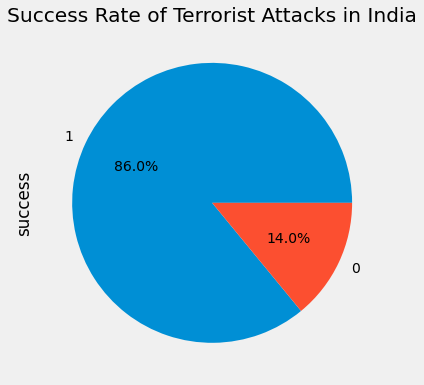

In [460]:
plt.style.use('fivethirtyeight')
India.success.value_counts().plot.pie(autopct='%1.1f%%',figsize=[6,6],title='Success Rate of Terrorist Attacks in India')

## Above animation gives quick overview of Attack Locations on Map, City under attack,No. of Casualties, No. of People Killed from 1972 to 2016 in World.

In [461]:
fig = px.scatter_geo(India,animation_frame=India.Year,color=India.Killed,width=900,height=650,hover_name=India.City,
                     hover_data=[India.Casualties],projection="natural earth",lat=India.latitude,lon=India.longitude,scope='asia')
fig.show()

## Above animation gives quick overview of Attack Locations on Map, City under attack,No. of Casualties, No. of People Killed from 1972 to 2016 in India.

In [462]:
###

## 1.1 Analysing Terrorism in Mumbai

In [463]:
Mumbai=df[df["City"]=='Mumbai']
#Mumbai['casualties']= Mumbai.nkill + Mumbai.nwound 
Mumbai.head(2)

Year  Month  Day Country      Region    City   latitude  longitude  \
60926  1995     11   13   India  South Asia  Mumbai  19.075984  72.877656   
62260  1996      4   29   India  South Asia  Mumbai  19.075984  72.877656   

          AttackType  Killed  ...                                     Target  \
60926  Assassination     1.0  ...  Managing director Thakiyudeen Abdul Wahid   
62260  Assassination     1.0  ...                Jayant Judhav (aide killed)   

      Summary    Group           Target_type Weapon_type  \
60926     NaN  Unknown   Airports & Aircraft    Firearms   
62260     NaN  Unknown  Government (General)    Firearms   

                          Weapon_Subtype host_kids Motive success  Casualties  
60926  Automatic or Semi-Automatic Rifle       NaN    NaN       1         2.0  
62260                   Unknown Gun Type       NaN    NaN       0         1.0  

[2 rows x 23 columns]

In [464]:
Mumbai_year=Mumbai.Year.value_counts()
Mumbai_year.head()

2008    7
2003    5
2011    3
2006    2
2002    2
Name: Year, dtype: int64

In [465]:
fig = po.Figure(data=[po.Bar(
            x=Mumbai_year.index, y=Mumbai_year.values,
            text=Mumbai_year.values,
            textposition='auto'
        )])
fig.update_layout(title='Terrorist Attacks in Mumbai Since 1995',yaxis={'title':'No. of Attacks'})
fig.show()

## Mumbai were 28 times targeted by Terrorists out of which 7 the most done in year 2008 alone.

In [466]:
Mumbai_group=Mumbai.Group.value_counts()
Mumbai_group

Unknown                                      10
Deccan Mujahideen                             7
Students Islamic Movement of India (SIMI)     4
Indian Mujahideen                             3
Vishwa Hindu Parishad (VHP)                   2
Lashkar-e-Taiba (LeT)                         1
Naxalites                                     1
Name: Group, dtype: int64

In [467]:
fig = po.Figure(data=[po.Bar(
            x=Mumbai_group.index, y=Mumbai_group.values,
            text=Mumbai_group.values,
            textposition='auto'
        )])
fig.update_layout(title='7 Group Attacked Mumbai',yaxis={'title':'No. of Attacks'})
fig.show()

## Operators behind 10 Attacks in Mumbai were Unknown. 

In [468]:
Mumbai_group_ca=Mumbai.groupby(['Group'])['Casualties','Killed','Wounded'].sum()
Mumbai_group_ca

<ipython-input-468-20570895cae0>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties  Killed  Wounded
Group                                                                 
Deccan Mujahideen                               435.0   183.0    252.0
Indian Mujahideen                               156.0    26.0    130.0
Lashkar-e-Taiba (LeT)                          1005.0   188.0    817.0
Naxalites                                         9.0     0.0      9.0
Students Islamic Movement of India (SIMI)       304.0    63.0    241.0
Unknown                                         104.0    14.0     90.0
Vishwa Hindu Parishad (VHP)                       3.0     0.0      3.0

In [469]:
Mumbai_group_ca.Wounded.index

Index(['Deccan Mujahideen', 'Indian Mujahideen', 'Lashkar-e-Taiba (LeT)',
       'Naxalites', 'Students Islamic Movement of India (SIMI)', 'Unknown',
       'Vishwa Hindu Parishad (VHP)'],
      dtype='object', name='Group')

In [470]:
fig = po.Figure(data=[
    po.Bar(name='Killed', x=Mumbai_group_ca.Killed.index, y=Mumbai_group_ca.Killed.values),
    po.Bar(name='Casualties', x=Mumbai_group_ca.Casualties.index, y=Mumbai_group_ca.Casualties.values),
    po.Bar(name='Wounded', x=Mumbai_group_ca.Wounded.index, y=Mumbai_group_ca.Wounded.values)
])
fig.update_layout(title='7 Terrorist Groups Attacked Mumbai')

fig.show()

## In Mumbai most Casualties caused by Lashkar-e-Taiba and its attributions like Deccan Mujahideen
## Lashkar-e-Taiba operated single Attack in Mumbai but caused highest Casualties(1005 peoples) out of which 188 were killed and 817 wounded.

In [471]:
Mumbai_target=Mumbai.groupby(['Target'])['Casualties'].sum()
Mumbai_target=Mumbai_target.sort_values(ascending=False)[0:8]
Mumbai_target

Target
People in rush hour                                              1005.0
The Gateway of India                                              202.0
The Taj Mahal and Tower Hotel was targeted in the attack.         144.0
Civilians at the Chhatrapati Shivaji Terminus railway station     134.0
Civilians                                                         104.0
The Leopold Café                                                   85.0
Mulund suburban commuter train station in Mumbai, India            75.0
The Oberoi-Trident Hotel complex                                   54.0
Name: Casualties, dtype: float64

In [472]:
fig = po.Figure(data=[po.Bar(
            x=Mumbai_target.index, y=Mumbai_target.values,
            text=Mumbai_target.values,
            textposition='auto'
        )])
fig.update_layout(title='Target Attacked by Terrorists',yaxis={'title':'No. of Casualties'})
fig.show()

## Civilians at Hotels and Stations are highly trageted by terrorists every time.

In [473]:
Mumbai_kids=Mumbai.groupby(['Group'])['host_kids'].sum()
Mumbai_kids

Group
Deccan Mujahideen                            249.0
Indian Mujahideen                              0.0
Lashkar-e-Taiba (LeT)                          0.0
Naxalites                                      0.0
Students Islamic Movement of India (SIMI)      0.0
Unknown                                        0.0
Vishwa Hindu Parishad (VHP)                    0.0
Name: host_kids, dtype: float64

## Deccan Mujahideen is only terrorist group who targeted Kids in Mumbai.

<AxesSubplot:title={'center':'Success Rate of Terrorist Attacks'}, ylabel='success'>

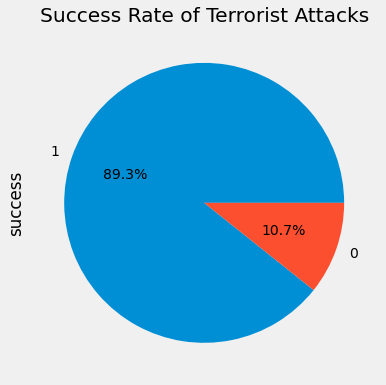

In [474]:
plt.style.use('fivethirtyeight')
Mumbai.success.value_counts().plot.pie(autopct='%1.1f%%',figsize=[6,6],title='Success Rate of Terrorist Attacks')

## Unfortunetly Around 90% of Terrorist Attacks in Mumbai were successful.

## Like Mumbai one can analyise City of thier Interest 

In [475]:
###

# 2.Analysing Terrrorism in World

## 2.1 Most ..... in the World.

In [476]:
Country=df.Country.value_counts()[0:20]
Country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [477]:
fig=px.bar(Country,x=df.Country.value_counts()[0:20].index,y=df.Country.value_counts()[0:20].values,title='20 Most attacked Countries by Terrorists',
          labels={'y':'No. of Terrorists Attacks','x':'Country Name'})
fig.show()

## Top 4 Most Attacked Countries are in Asia and Total 10 i.e 50% Asian Contries in 20 most attacked countries
## and agian most of them are in Middle East.
## 3 each in South America, Europe and Africa and only one U.S. in North America

In [478]:
country=df.groupby(["Country"])["Casualties",'Killed','Wounded'].sum().sort_values(by='Casualties',ascending=False)[0:20]
country


<ipython-input-478-bf17e67f7097>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties   Killed   Wounded
Country                                     
Iraq             202982.0  78589.0  134690.0
Afghanistan       80213.0  39384.0   44277.0
Pakistan          64427.0  23822.0   42038.0
India             47108.0  19341.0   28980.0
Sri Lanka         29792.0  15530.0   15561.0
United States     24469.0   3771.0   20702.0
Colombia          23767.0  14698.0   10328.0
Philippines       22361.0   9559.0   13367.0
Nigeria           21728.0  22682.0   10239.0
Syria             21614.0  15229.0   14109.0
Algeria           19296.0  11066.0    9150.0
Somalia           16720.0  10273.0    8875.0
Turkey            16694.0   6888.0    9899.0
Yemen             16288.0   8776.0    9328.0
Peru              16246.0  12771.0    4078.0
El Salvador       16181.0  12053.0    5062.0
Lebanon           14765.0   4061.0   10904.0
Russia            11126.0   4308.0    7441.0
Thailand          10476.0   2742.0    7818.0
Nicaragua         10437.0  10598.0    1731.0

In [479]:
fig = po.Figure(data=[
    po.Bar(name='Caualties', x=country.Casualties.index, y=country.Casualties.values),
    po.Bar(name='Killed', x=country.Killed.index, y=country.Killed.values),
    po.Bar(name='Wounded', x=country.Wounded.index, y=country.Wounded.values)
])
fig.update_layout(title='Total Casualties,No. of People Killed and Wounded of 20 Most Affacted countries')
fig.show()

## Few Countries like Syria and last four are not in List of 20 most Attacked Countries but they in 20 most affacted Countries in World i.e. faced more Casualties.

In [480]:
city=df.groupby(["City"])["Killed"].sum()
city=city.sort_values(ascending=False)[0:20]
city

City
Unknown          22647.0
Baghdad          21151.0
Mosul             7140.0
Mogadishu         3913.0
Karachi           3688.0
New York City     2838.0
Tikrit            2679.0
Kabul             2493.0
Ramadi            2313.0
Maiduguri         2235.0
Aleppo            2125.0
Beirut            1916.0
Fallujah          1837.0
Baqubah           1779.0
Quetta            1748.0
Peshawar          1634.0
Kirkuk            1628.0
Colombo           1386.0
Belfast           1354.0
Damascus          1344.0
Name: Killed, dtype: float64

In [481]:
fig=px.bar(country,x=city.index,y=city.values,title='20 city faced Most kills due to Terrorism',
        labels={'y':'No. of People Killed','x':'City'})
fig.show()



## Bang!! Bangdad the Capital of MOst Attacked Country Iraq alone records around 22k Kills i.e. combined equal to next 5 cities in list.

In [482]:
##

## 2.2 Aanlysing Regions

In [483]:
Region_att=df.groupby(['Region'])['Casualties','Killed','Wounded'].sum()
Region_att

<ipython-input-483-7479aa76c7c3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties    Killed   Wounded
Region                                                     
Australasia & Oceania             409.0     150.0     260.0
Central America & Caribbean     34530.0   28708.0    8991.0
Central Asia                     2969.0    1000.0    2009.0
East Asia                       10003.0    1152.0    9213.0
Eastern Europe                  18239.0    7415.0   12045.0
Middle East & North Africa     329807.0  137642.0  214308.0
North America                   26398.0    4916.0   21531.0
South America                   43562.0   28849.0   16704.0
South Asia                     234366.0  101319.0  141360.0
Southeast Asia                  40841.0   15637.0   26259.0
Sub-Saharan Africa             108990.0   78386.0   52857.0
Western Europe                  22778.0    6694.0   18332.0

In [484]:
Region_att.Casualties.index

Index(['Australasia & Oceania', 'Central America & Caribbean', 'Central Asia',
       'East Asia', 'Eastern Europe', 'Middle East & North Africa',
       'North America', 'South America', 'South Asia', 'Southeast Asia',
       'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='Region')

In [485]:
fig = po.Figure(data=[
    po.Bar(name='Killed', x=Region_att.Killed.index, y=Region_att.Killed.values),
    po.Bar(name='Casualties', x=Region_att.Casualties.index, y=Region_att.Casualties.values),
    po.Bar(name='Wounded', x=Region_att.Wounded.index, y=Region_att.Wounded.values)
])
fig.update_layout(title='Total Casualties,Killed and Wounded in All Regions')

fig.show()

## Central Asia, East Asia and Australasia are few least affacted Regions.
## While Middle East & North Africa and South Asia records around 5.6 Lakhs Casualties and 2.47 Lakhs Kills

In [486]:
fig = px.pie(India_group, values=Region_att.Casualties.values, names=Region_att.Casualties.index, title='Casualties(in %) in All Regions',
            labels={'values':'No. of Casualties','names':'Region'},hole=0.2)
fig.show()

In [487]:
regions=df.Region.value_counts()
regions

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [488]:
fig = px.pie(regions, values=regions.values, names=regions.index, title='Region by No. of Attacks(%)',
            labels={'values':'No. of Attacks','index':'Region'},hole=0.2)
fig.show()

## Around 52% of Total Terrorist Attacks happend in only two Regions- 1.Middle East & North Africa and 2.South Asia

In [489]:
##

## 2.3 Analysing Attack Type-Subtype, Target-Sub Target and Weapon Type-Subtype.

In [490]:
df.AttackType.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

In [491]:
fig = px.pie(India_group, values=df.AttackType.value_counts().values, names=df.AttackType.value_counts().index, title='Attack Type(in %)',
            labels={'values':'No. of Time Used','names':'Attack Type'},hole=0.2)
fig.show()


In [492]:
attacktype_kill=df.groupby(['AttackType'])['Casualties','Killed','Wounded'].sum()
attacktype_kill

<ipython-input-492-078652b38a0e>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties    Killed   Wounded
AttackType                                                         
Armed Assault                          212386.0  160297.0   77366.0
Assassination                           37209.0   24920.0   13887.0
Bombing/Explosion                      514233.0  157321.0  372686.0
Facility/Infrastructure Attack           6293.0    3642.0    3765.0
Hijacking                               20642.0    3718.0   17001.0
Hostage Taking (Barricade Incident)      7465.0    4478.0    3966.0
Hostage Taking (Kidnapping)             20267.0   24231.0    6446.0
Unarmed Assault                         14791.0     880.0   14027.0
Unknown                                 39606.0   32381.0   14725.0

In [493]:
fig = po.Figure(data=[
    po.Bar(name='Killed', x=attacktype_kill.Killed.index, y=attacktype_kill.Killed.values),
    po.Bar(name='Casualties', x=attacktype_kill.Casualties.index, y=attacktype_kill.Casualties.values),
    po.Bar(name='Wounded', x=attacktype_kill.Wounded.index, y=attacktype_kill.Wounded.values)
])
fig.update_layout(title='Total Casualties,Killed and Wounded by All Attack Type')

fig.show()

## Bombng and Explosions Killed around 1.57 Lakhs peoples and wounded 3.72 lakhs peoples !!

In [494]:
targtype_cas=df.groupby(['Target_type'])['Casualties','Killed','Wounded'].sum()
targtype_cas.head()

<ipython-input-494-f2fe2eee15ff>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Casualties   Killed  Wounded
Target_type                                          
Abortion Related               55.0     10.0     46.0
Airports & Aircraft          6795.0   3767.0   3478.0
Business                    75477.0  23487.0  54531.0
Educational Institution     13574.0   3745.0  10227.0
Food or Water Supply          501.0    313.0    234.0

In [495]:
fig = po.Figure(data=[
    po.Bar(name='Killed', x=targtype_cas.Killed.index, y=targtype_cas.Killed.values),
    po.Bar(name='Casualties', x=targtype_cas.Casualties.index, y=targtype_cas.Casualties.values),
    po.Bar(name='Wounded', x=targtype_cas.Wounded.index, y=targtype_cas.Wounded.values)
])
fig.update_layout(title='Total Casualties,Killed and Wounded by All Attack Type')

fig.show()

## Private Citizens are drasticaly affacted by Terrorism.
## Business, Govt. and Transportation also affacted highly after Military the second most affacted.

In [496]:
targsubtype_kill=df.groupby(['Target_Subtype'])['Casualties'].sum()
targsubtype_kill=targsubtype_kill.sort_values(ascending=False)[0:10]
targsubtype_kill

Target_Subtype
Unnamed Civilian/Unspecified                               101748.0
Military Unit/Patrol/Convoy                                 51622.0
Village/City/Town/Suburb                                    50068.0
Marketplace/Plaza/Square                                    44005.0
Police Security Forces/Officers                             41268.0
Military Barracks/Base/Headquarters/Checkpost               35655.0
Military Personnel (soldiers, troops, officers, forces)     34625.0
Police Building (headquarters, station, school)             32510.0
Place of Worship                                            26852.0
Police Patrol (including vehicles and convoys)              23125.0
Name: Casualties, dtype: float64

In [497]:
fig=px.bar(Region_att,x=targsubtype_kill.index,y=targsubtype_kill.values,title='10 Most Favourite Sub-Target Type of Terrorists',
          labels={'y':'No. of Casualties','x':'Sub-Target Type'})
fig.show()


## Military Bodies and Police are highly targeted by Terrorists after cilvilians.

In [498]:
group_attack=df.Group.value_counts()[0:20]
group_attack['Unknown']

82782

## Around 82k Terrorists Attacks were done by Unknown Groups or Intelligence Agencies were failed to find the operators

In [499]:
group_attack=group_attack.drop('Unknown')
group_attack

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [500]:
fig=px.bar(Region_att,y=group_attack.index,x=group_attack.values,title='20 Most Known Active Terroist Group in the World',orientation='h',
          labels={'x':'No. of Attacks','y':'Group Name'})
fig.show()

## Most of Terrorist Groups above are from Middle East and South Asia.

In [501]:
group_kill=df.groupby(['Group'])['Casualties'].sum()
group_kill=group_kill.sort_values(ascending=False)[0:10]
group_kill['Unknown']

313997.0

## Around 31K Casualties in World are casued by Unknown Terrorist Groups

In [502]:
group_kill=group_kill.drop('Unknown')
group_kill

Group
Islamic State of Iraq and the Levant (ISIL)    58223.0
Taliban                                        54459.0
Al-Qaida                                       28340.0
Liberation Tigers of Tamil Eelam (LTTE)        20859.0
Boko Haram                                     20305.0
Tehrik-i-Taliban Pakistan (TTP)                15314.0
Al-Shabaab                                     14541.0
Al-Qaida in Iraq                               14410.0
Shining Path (SL)                              14059.0
Name: Casualties, dtype: float64

In [503]:
fig=px.bar(Region_att,y=group_kill.index,x=group_kill.values,title='10 Most Known Deadliest Terroist Group in the World',orientation='h',
          labels={'x':'No. of People Killed','y':'Group Name'})
fig.show()

## ISIL operated less attacks than Taliban(Highest Attack Operator Group in Wolrd) but caused more Kills - around 60K.

In [504]:
weaptype=df.Weapon_type.value_counts()
weaptype

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [505]:
fig = px.pie(India_group, values=weaptype.values, names=weaptype.index, title='Weapon Type(in %)',
            labels={'values':'No. of Time Used','names':'Weapon Type'},hole=0.2)
fig.show()

## Explosives are most used weapons by Terrorist after Firearms and Incendiary

In [506]:
weapon=df.Weapon_Subtype.value_counts()[0:15]
weapon

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Name: Weapon_Subtype, dtype: int64

In [507]:
fig=px.bar(Region_att,y=weapon.index,x=weapon.values,title='10 Most Used Weapons by Terroist Group in the World',orientation='h',
          labels={'x':'No. of Time Used','y':'Weapon Name'})
fig.show()


## Analysing extra parametes like Property Damage, Host Kids,Days of Attacks,Months etc.

In [508]:
df.Property_Damage.value_counts()

Minor (likely < $1 million)                      43304
Unknown                                          19846
Major (likely >= $1 million but < $1 billion)      909
Catastrophic (likely >= $1 billion)                  6
Name: Property_Damage, dtype: int64

In [509]:
fig = px.pie(India_group, values=df.Property_Damage.value_counts().values, names=df.Property_Damage.value_counts().index, title='Property Damage Type(in %)',
            labels={'values':'No. of Time','names':'Damage Worth'},hole=0.2)
fig.show()

In [510]:
kids=df.groupby(['Region'])['host_kids'].sum()
kids=kids.sort_values(ascending=False)[0:6]
kids

Region
Middle East & North Africa     27755.0
South Asia                     19959.0
Central America & Caribbean    16566.0
Eastern Europe                  5999.0
Southeast Asia                  4044.0
Sub-Saharan Africa              2650.0
Name: host_kids, dtype: float64

In [511]:
fig = px.pie(India_group, values=kids.values, names=kids.index, title='Region by No. of Kids as Host by Terrorists %)',
            labels={'values':'No. of Kids','names':'Region'},hole=0.2)
fig.show()

## Kids are more targeted in Middle East and North Africa

In [512]:
days=df.Day.value_counts().sort_values()
days[0:10]

0      891
31    3095
30    5046
29    5507
24    5752
6     5781
23    5782
22    5799
26    5823
21    5827
Name: Day, dtype: int64

In [513]:
fig=px.bar(days,x=days.index,y=days.values,title='Frequency of No. of Days Attack was Active for',
          labels={'y':'No. of Attacks','index':'No. of Days'})
fig.show()

## Average Days for which Terrorist Attacks was active is almost 15 days.
## Only 891 Attacks were controlled in single day.

In [514]:
months=df.Month.value_counts()
months=months.drop(0)
months

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
Name: Month, dtype: int64

In [515]:
fig=px.bar(months,x=months.index,y=months.values,title='Frequency of No. of Days Attack was Active for',
          labels={'y':'No. of ATtacks','index':'Month No. 1 to 12'})
fig.show()

## Most Attacks Taken place in 5th i.e. May and least in February. 

In [516]:
###

## 3. Extra PLots

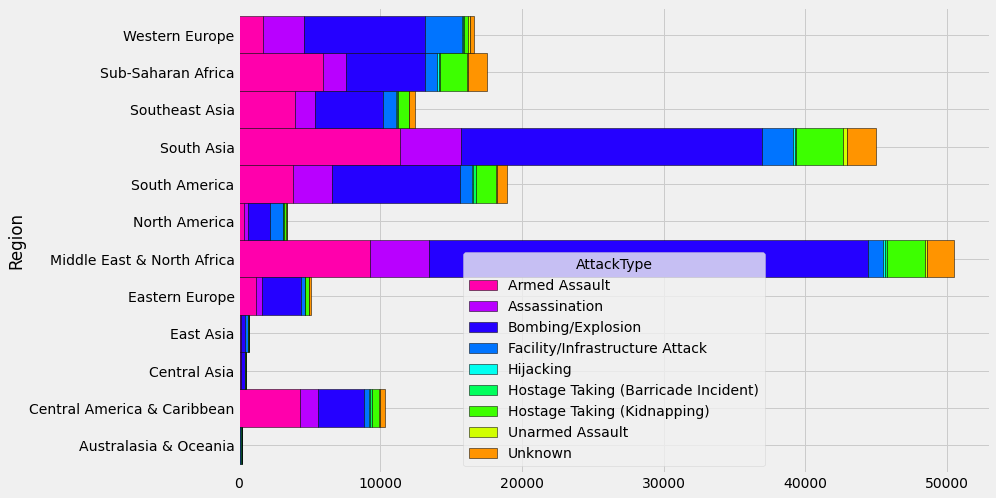

In [517]:
regionbyattacktype=pd.crosstab(df.Region,df.AttackType)
regionbyattacktype.plot.barh(stacked=True,width=1,color=sns.color_palette('hsv_r',9),edgecolor='Black')
fig=plt.gcf()
fig.set_size_inches(12,8)


## Bombing/Explosion is most used Attack Type by Terrorists in all regions.
## Central America is only Region where Armed Assault(2nd Most Used Attacks Type) more used than Explosions.


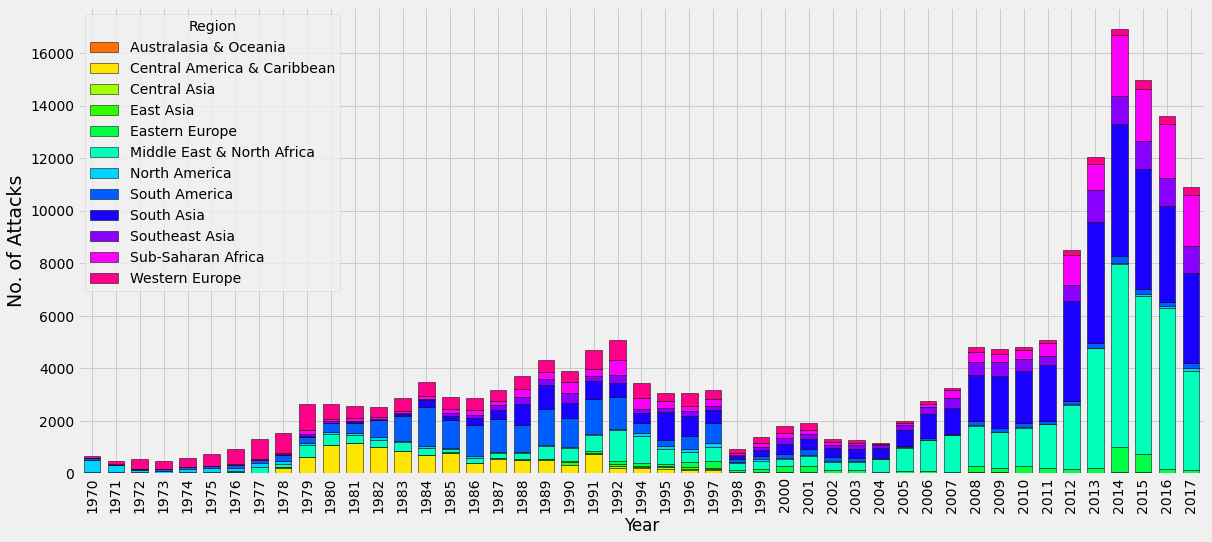

In [518]:
year_region=pd.crosstab(df.Year,df.Region)
year_region.plot.bar(stacked=True,width=0.7,color=sns.color_palette('hsv',12),edgecolor='k')
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.ylabel('No. of Attacks',size=19)
plt.show()

## From 1979 to 1997 Regions like South America, Central America and Caribbean and Western Europe are highly affacted.
## 2012!! was the 1st year in history when total Terrorist Attacks in World crossed mark of 8000.
## 2014 registered highest attacks around 17000 snice 1972.

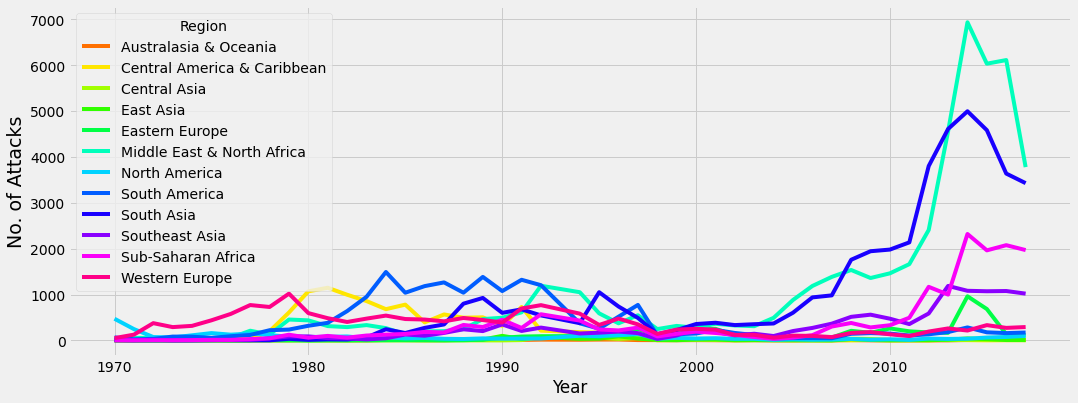

In [519]:
year_region.plot(color=sns.color_palette('hsv',12))
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.grid(True)
plt.ylabel('No. of Attacks',size=19)
plt.show()

# Some Insight-
## Austalasia and Oceania is least affacted Region by Terrorism.
## Terrorist attacks start incresing fastly from 2003-4 in regions like Middle East & North Africa and South Asia.
## same Pattern can be observed for Regions Southeast Asia and Sub-Saharan Africa from 2006.


In [520]:
df=df.replace(np.nan,0)

# Animation 2.0

In [ ]:
fig = px.scatter_geo(df,animation_frame=df.Year,color=df.Killed,width=900,height=650,hover_data=[df.Casualties],
                     hover_name=df.Country, projection="natural earth",lat=df.latitude,lon=df.longitude,
                    title='Terrorist Attack Locations all over the World Since 1972')
fig.show()

## Above animation gives quick overview of Attack Locations on Map, City under attack,No. of Casualties, No. of People Killed from 1972 to 2016 in World.

In [ ]:
px.scatter(df, x=df.Region, y=df.Casualties, animation_frame=df.Year,width=900,height=650,
            color=df.Killed, hover_name=df.City,range_y=[0,100],hover_data=[df.Wounded],
           title='Casualties and Kills in Terrorist Attacks in All Regions snice 1972')


## Above animation shows No. of Casualties, NO. of People Killed, No. of People Wounded in different Regions of world from 1972 to 1973.

## Thanks and Happy Learning